In [1]:
import pandas as pd

datos = pd.read_csv("train.csv")

In [2]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

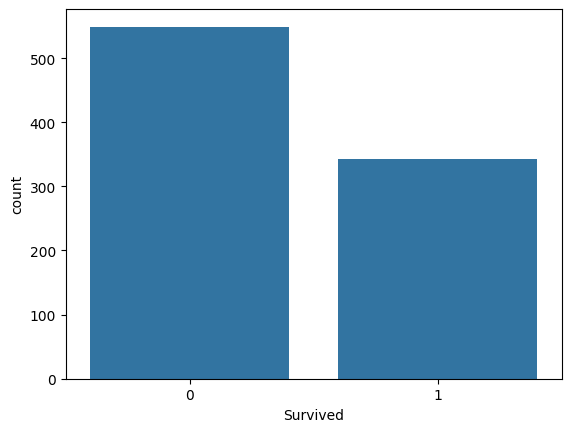

In [4]:
import seaborn as sb

sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

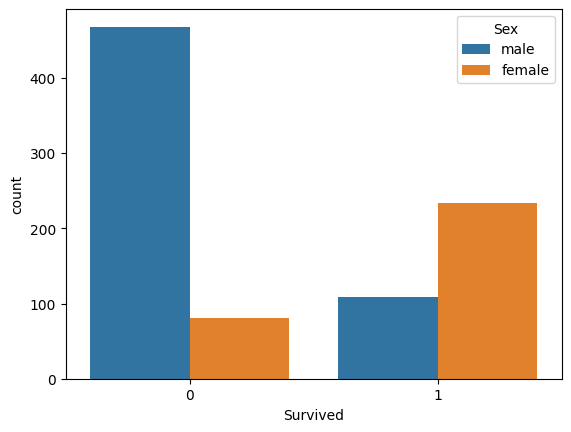

In [5]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [6]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

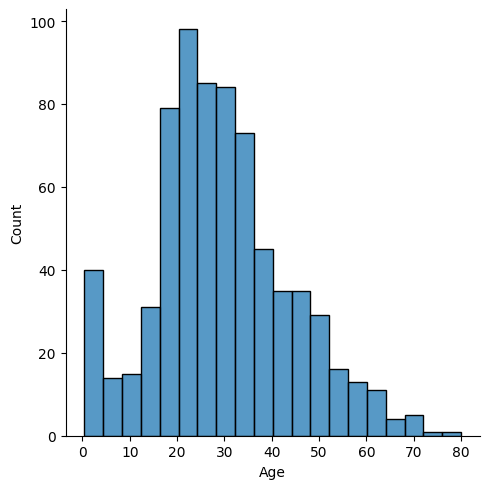

In [7]:
sb.displot(x="Age", data=datos)

In [8]:
datos["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
datos["Age"].mean()

29.69911764705882

In [10]:
datos["Age"].fillna(datos["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [11]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [12]:
datos["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [13]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
datos = datos.drop(["Cabin"], axis=1)

In [15]:
datos["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
datos = datos.dropna()

In [17]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [19]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

In [20]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

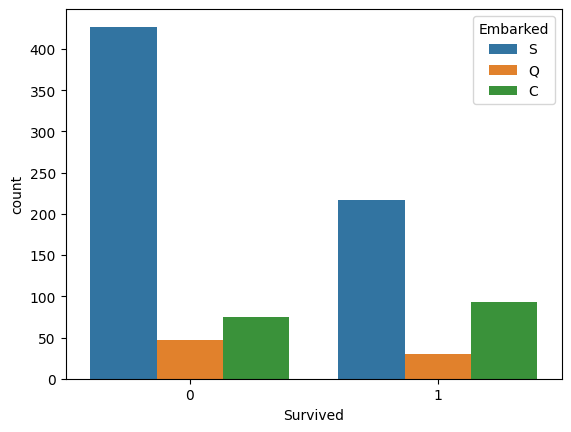

In [21]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [22]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)

In [23]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

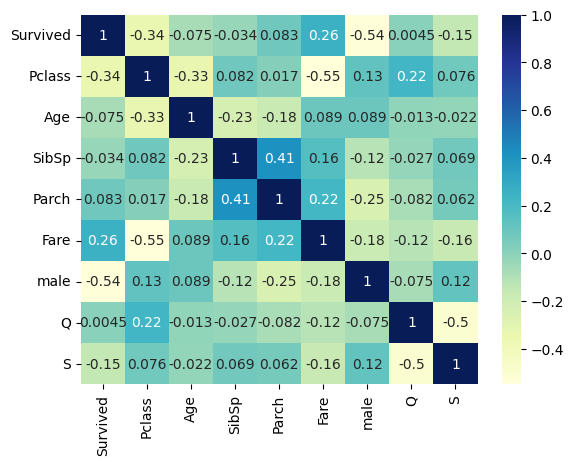

In [24]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

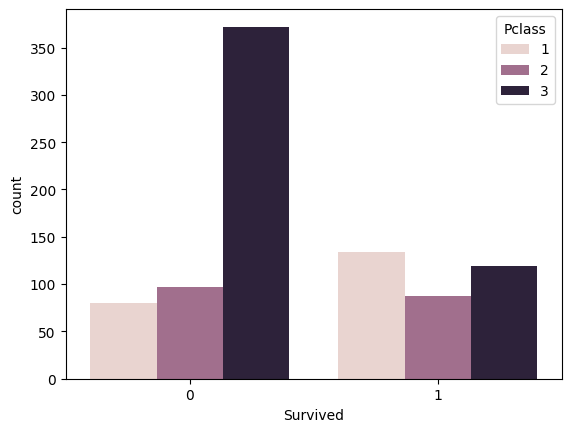

In [25]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [26]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [38]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [40]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=50)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pru, predicciones)

0.5561797752808989

In [48]:
from sklearn.tree import DecisionTreeClassifier


resultados=[]

for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}:{exactitud}")

  resultados.append(exactitud)

Resultado para 1:0.5168539325842697
Resultado para 2:0.6179775280898876
Resultado para 3:0.5561797752808989
Resultado para 4:0.5955056179775281
Resultado para 5:0.5955056179775281
Resultado para 6:0.5898876404494382
Resultado para 7:0.5842696629213483
Resultado para 8:0.5955056179775281
Resultado para 9:0.5617977528089888
Resultado para 10:0.5674157303370787
Resultado para 11:0.550561797752809
Resultado para 12:0.550561797752809
Resultado para 13:0.5730337078651685
Resultado para 14:0.5617977528089888


<Axes: >

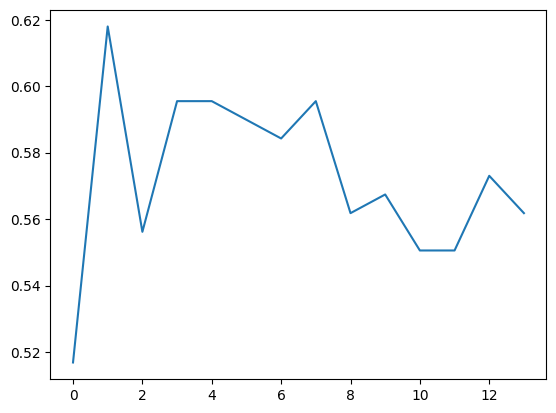

In [49]:
sb.lineplot(data=resultados)

In [51]:
modelo = DecisionTreeClassifier(max_depth=i)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66       111
           1       0.41      0.37      0.39        67

    accuracy                           0.56       178
   macro avg       0.53      0.52      0.52       178
weighted avg       0.55      0.56      0.56       178



In [53]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No","Real: Si"])

,Pred: No,Pred: Si
Real: No,75,36
Real: Si,42,25


In [54]:
X_ent.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

[Text(0.4135325492341357, 0.9666666666666667, 'male <= 0.5\n0.473\n711\n[438, 273]\nMurio'),
 Text(0.19939824945295404, 0.9, 'Pclass <= 2.5\n0.386\n253\n[66, 187]\nVivio'),
 Text(0.08150984682713348, 0.8333333333333334, 'Age <= 3.0\n0.094\n141\n[7, 134]\nVivio'),
 Text(0.05908096280087528, 0.7666666666666667, 'Pclass <= 1.5\n0.5\n2\n[1, 1]\nMurio'),
 Text(0.05032822757111598, 0.7, '0.0\n1\n[1, 0]\nMurio'),
 Text(0.06783369803063458, 0.7, '0.0\n1\n[0, 1]\nVivio'),
 Text(0.10393873085339168, 0.7666666666666667, 'Fare <= 29.356\n0.083\n139\n[6, 133]\nVivio'),
 Text(0.08533916849015317, 0.7, 'Fare <= 28.231\n0.155\n59\n[5, 54]\nVivio'),
 Text(0.07658643326039387, 0.6333333333333333, 'Age <= 56.0\n0.128\n58\n[4, 54]\nVivio'),
 Text(0.04814004376367615, 0.5666666666666667, 'SibSp <= 0.5\n0.101\n56\n[3, 53]\nVivio'),
 Text(0.0175054704595186, 0.5, 'Age <= 37.0\n0.046\n42\n[1, 41]\nVivio'),
 Text(0.0087527352297593, 0.43333333333333335, '0.0\n29\n[0, 29]\nVivio'),
 Text(0.0262582056892779, 0.4

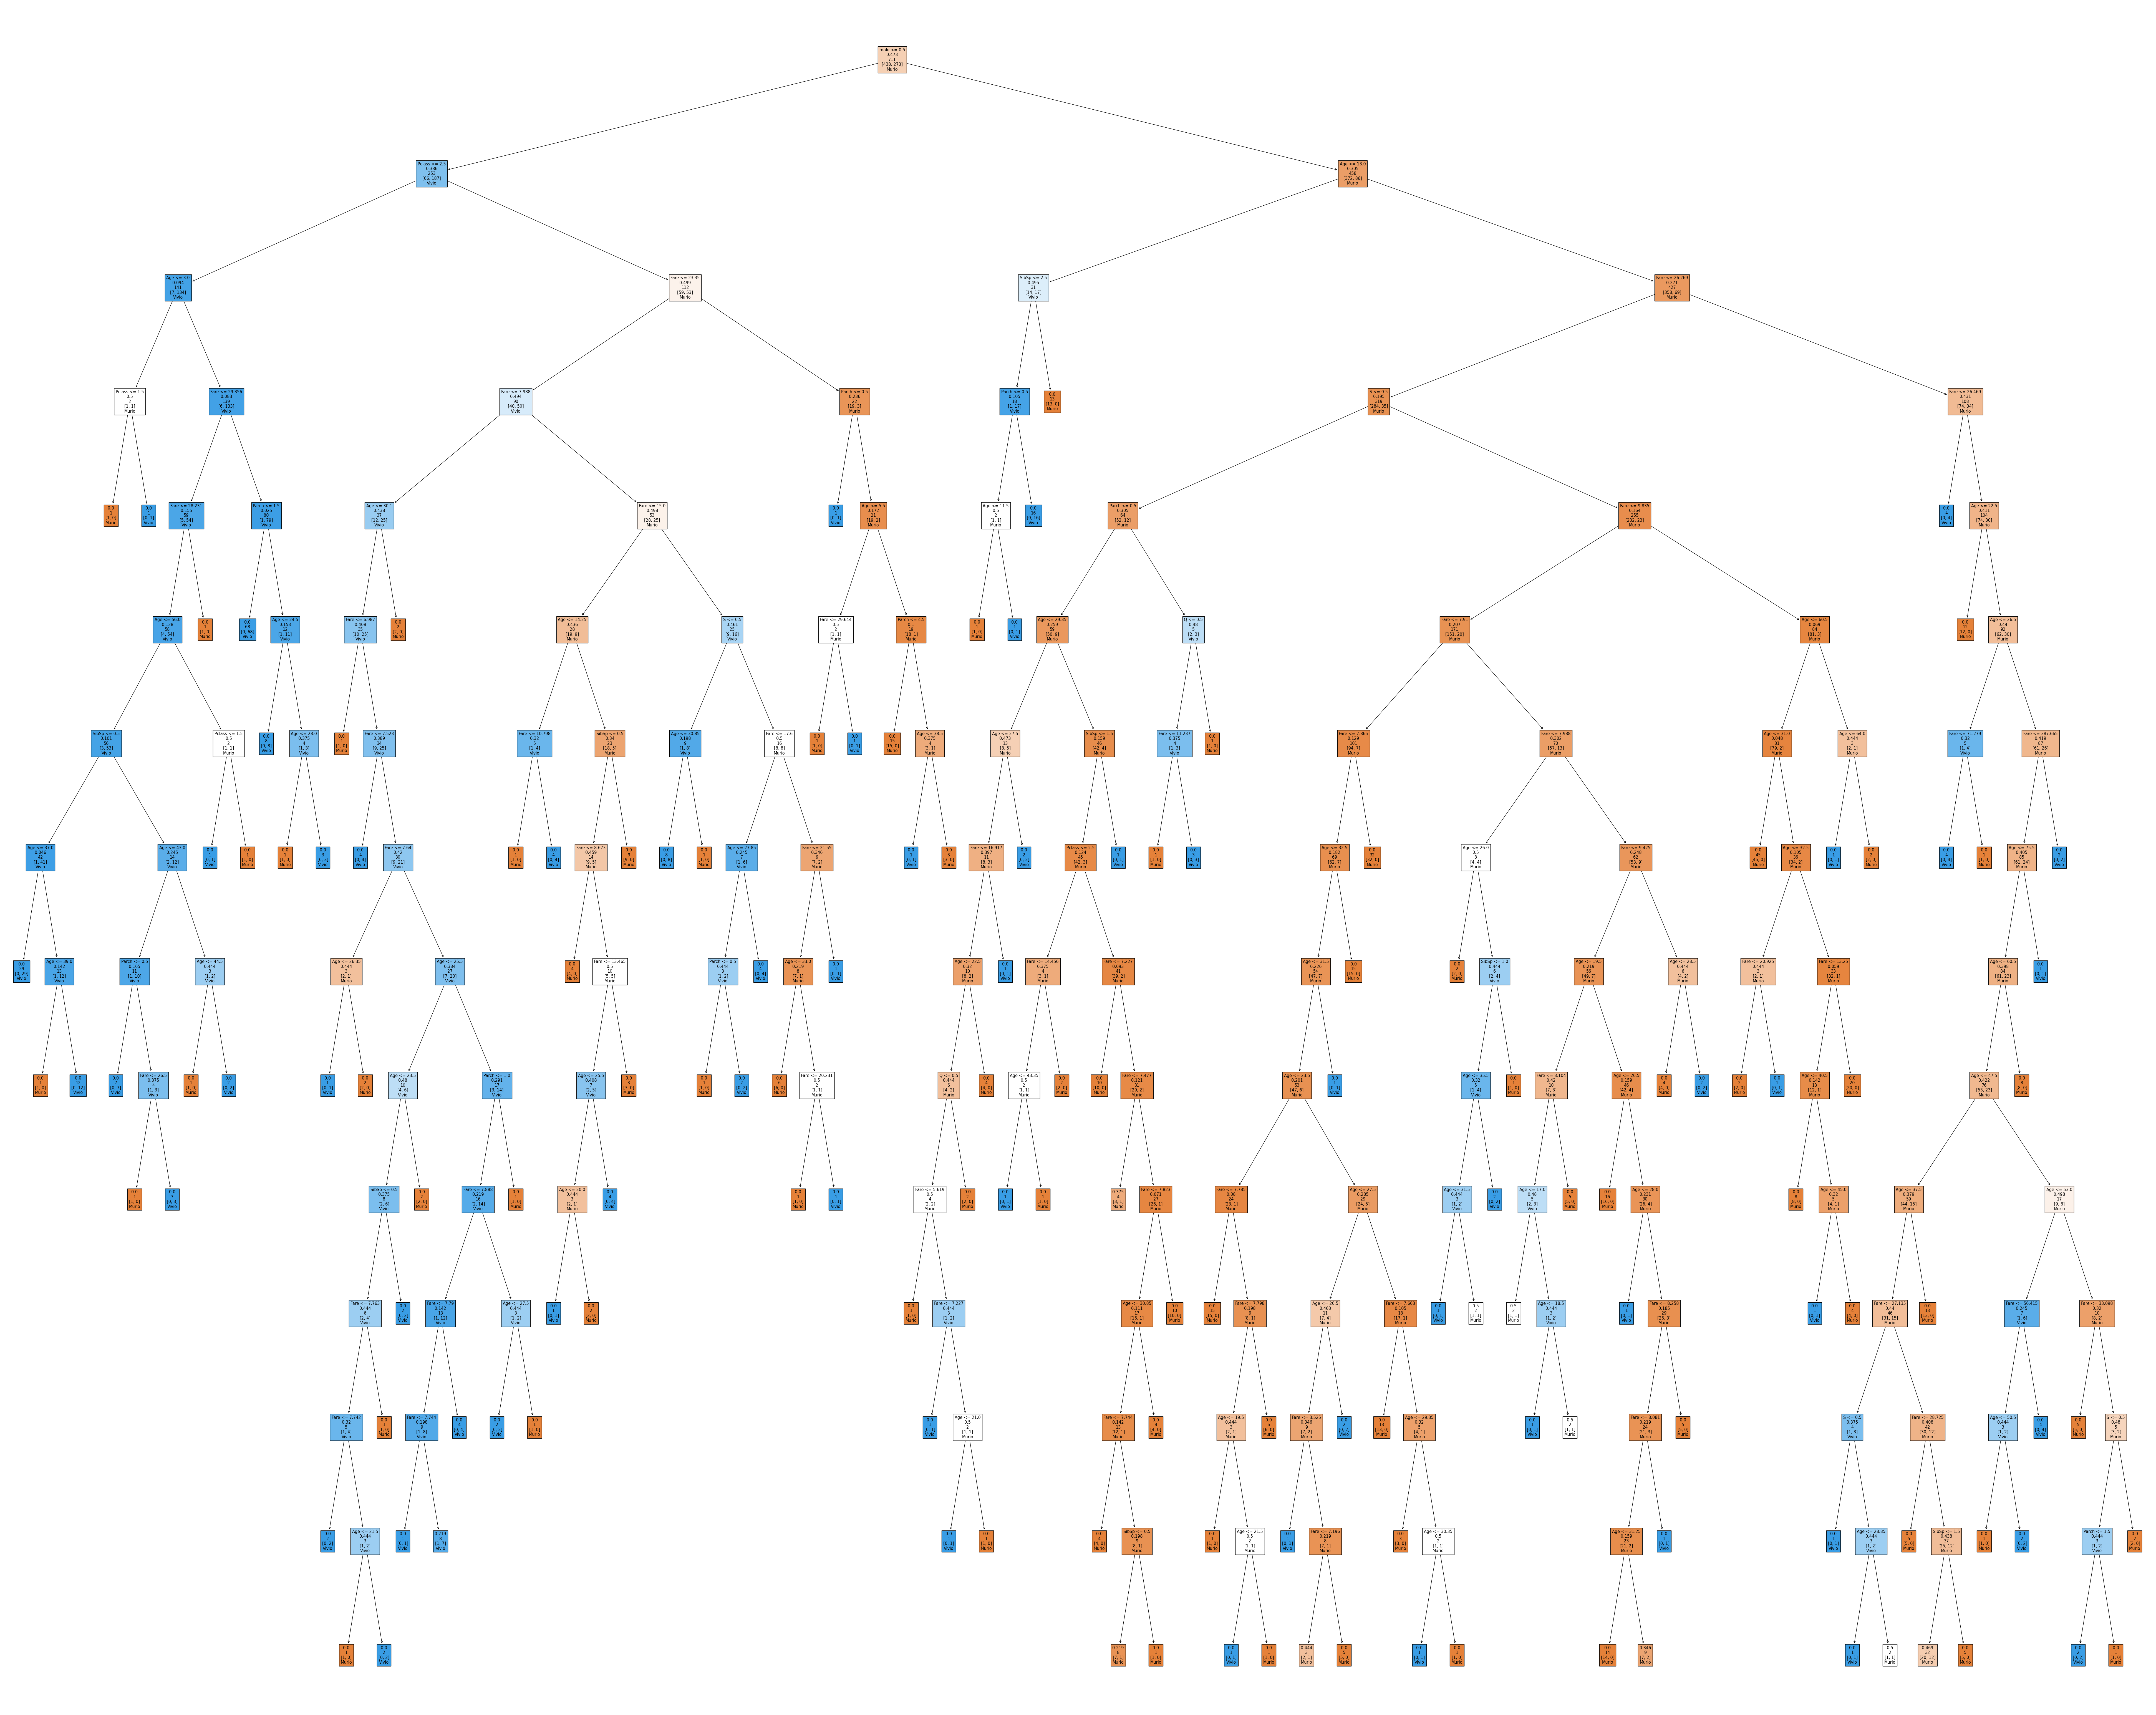

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))

plot_tree(
    modelo,
    feature_names=X_ent.columns,
    class_names = ["Murio", "Vivio"],
    filled=True, label="none"
)